---
### Import Libraries

In [1]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("parkinsons/parkinsons.csv")

### Exploratory Data Analysis

In [2]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


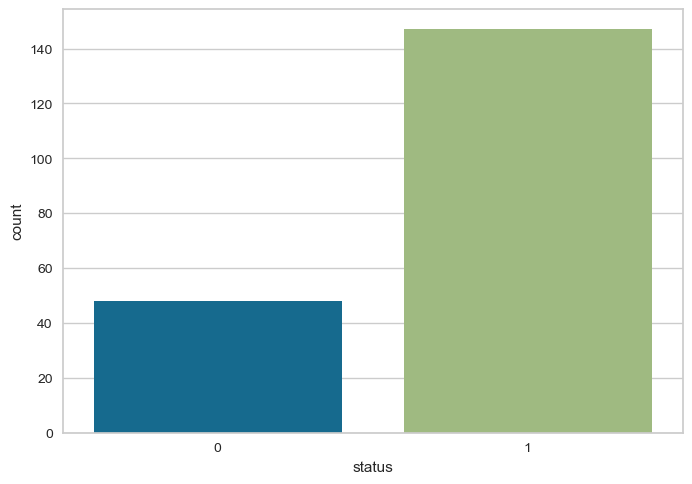

In [5]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

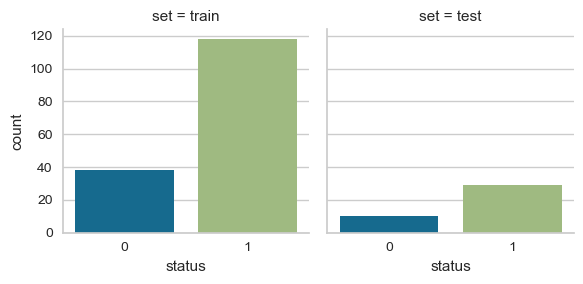

Training dataset           : 156
Unseen data for validation : 39


In [2]:
test_df = df.sample(frac=0.2)
train_df = df.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [3]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'], fix_imbalance=True, session_id=123, remove_outliers = True)




,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(156, 25)"
4,Transformed data shape,"(199, 24)"
5,Transformed train set shape,"(152, 24)"
6,Transformed test set shape,"(47, 24)"
7,Ignore features,1
8,Numeric features,22
9,Categorical features,1


### Model selection

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9513,0.9933,0.9789,0.9618,0.9689,0.8545,0.8680,0.3940
lightgbm,Light Gradient Boosting Machine,0.9513,0.9822,0.9678,0.9689,0.9677,0.8672,0.8713,0.3090
rf,Random Forest Classifier,0.9263,0.9859,0.9244,0.9800,0.9486,0.8139,0.8299,0.4130
ada,Ada Boost Classifier,0.9263,0.9637,0.9356,0.9700,0.9499,0.8053,0.8207,0.2540
gbc,Gradient Boosting Classifier,0.9026,0.9461,0.9467,0.9359,0.9380,0.6908,0.7032,0.3000
dt,Decision Tree Classifier,0.8776,0.8183,0.9367,0.9123,0.9224,0.6288,0.6355,0.1220
knn,K Neighbors Classifier,0.8263,0.8825,0.9011,0.8799,0.8869,0.4840,0.4888,0.1270
lda,Linear Discriminant Analysis,0.8192,0.8663,0.8378,0.9227,0.8706,0.5425,0.5597,0.1310
lr,Logistic Regression,0.8109,0.8969,0.8267,0.9280,0.8693,0.5009,0.5197,1.0270
ridge,Ridge Classifier,0.8096,0.0000,0.8033,0.9449,0.8608,0.5414,0.5696,0.1080


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Create Extra Trees Classifier Model

In [4]:
extraTreesClassifier = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9444,0.8889,0.8889,0.8889,0.3889,0.3889
1,0.8182,1.0000,1.0000,0.8182,0.9000,0.0000,0.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.9583,0.8750,1.0000,0.9333,0.7925,0.8101
4,0.8182,1.0000,1.0000,0.8000,0.8889,0.4211,0.5164
5,0.7273,0.8750,0.7500,0.8571,0.8000,0.3774,0.3858
6,0.7273,0.8958,0.7500,0.8571,0.8000,0.3774,0.3858
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9091,0.9167,1.0000,0.8889,0.9412,0.7442,0.7698


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuned Model

In [5]:
tuned_extraTreesClassifier = tune_model(extraTreesClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8889,0.8889,0.8889,0.8889,0.3889,0.3889
1,0.7273,0.8889,0.8889,0.8000,0.8421,-0.1379,-0.1491
2,0.9091,1.0000,0.8750,1.0000,0.9333,0.7925,0.8101
3,0.8182,0.9583,0.7500,1.0000,0.8571,0.6207,0.6708
4,0.8182,0.9583,0.8750,0.8750,0.8750,0.5417,0.5417
5,0.7273,0.9167,0.6250,1.0000,0.7692,0.4762,0.5590
6,0.8182,0.9167,0.7500,1.0000,0.8571,0.6207,0.6708
7,0.9091,1.0000,0.8750,1.0000,0.9333,0.7925,0.8101
8,0.9091,0.9583,1.0000,0.8889,0.9412,0.7442,0.7698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate training performance

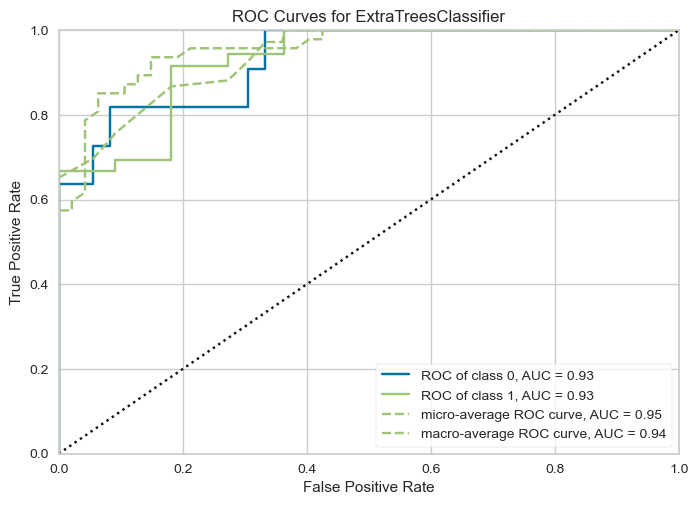

In [6]:
plot_model(tuned_extraTreesClassifier, plot = 'auc')

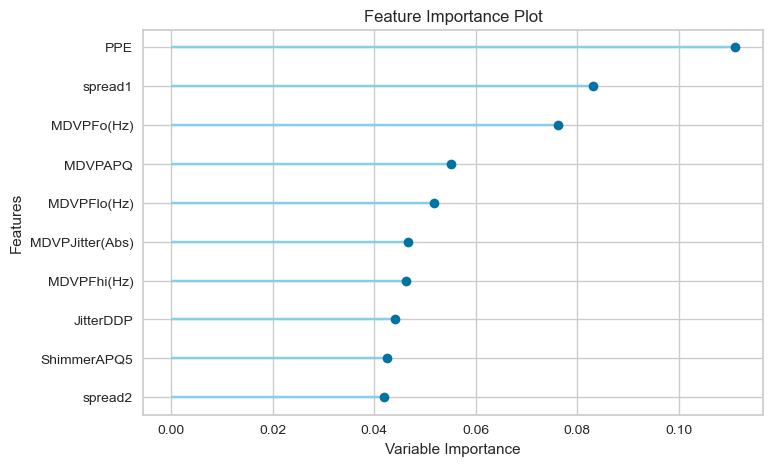

In [23]:
plot_model(tuned_extraTreesClassifier, plot='feature')

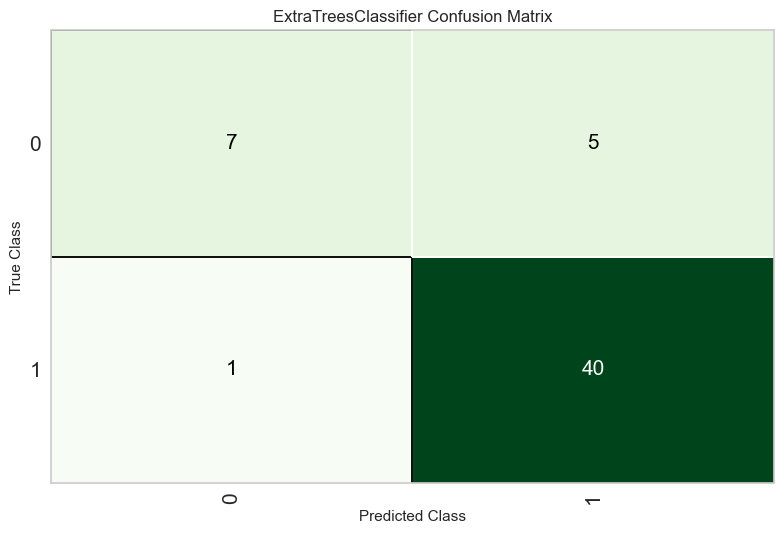

In [24]:
plot_model(tuned_extraTreesClassifier, plot = 'confusion_matrix')

### Evaluate on unseen data

In [7]:
final_extraTreesClassifier = finalize_model(tuned_extraTreesClassifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9487,0.9862,0.9655,0.9655,0.9655,0.8655,0.8655


              precision    recall  f1-score   support

   parkinson       0.90      0.90      0.90        10
      normal       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



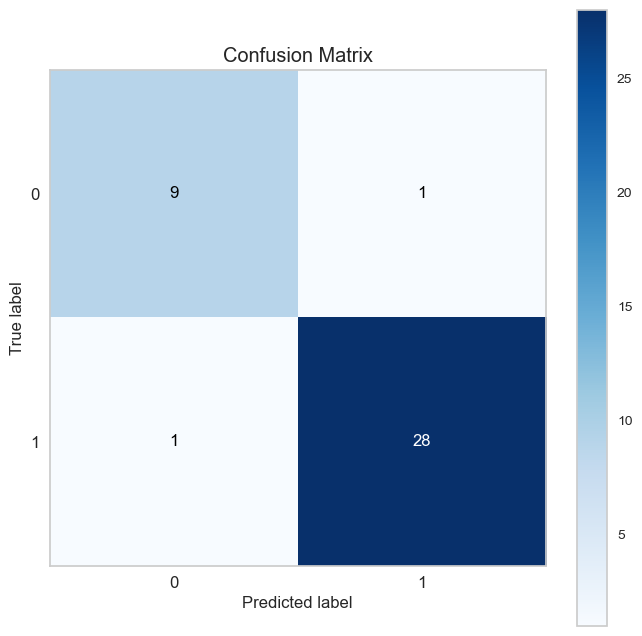

In [8]:
unseen_predictions = predict_model(final_extraTreesClassifier, data=test_df)
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)


